In [61]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import exp, log10

def perform_ILT(file_path, alpha=10, dmin=0, interacoes=15, pontos=200, Ti=0.001, Tf=10):

    #------------------------------------------------------------------------
    # ToolBox Laplace -  Tiago Bueno de Moraes
    #------------------------------------------------------------------------

    # Leitura dados
    with open(file_path, 'r') as data:
        Sig = []
        for row in data:
            Sig.append([float(x) for x in row.split()])
        Sig = np.array(Sig)

    t = np.array(Sig[:, 0] / 1000)
    Mx = np.array(Sig[:, 1])
    My = np.zeros(np.size(Mx))

    # Início Código
    n = len(Mx)

    T = np.logspace(log10(Ti), log10(Tf), pontos)

    K = []
    for i in range(0, n):
        row = []
        for j in range(0, pontos):
            row.append(exp(-t[i] / T[j]))
        K.append(row)
    K = np.array(K)

    # matriz Omega
    O = K.conj().T @ K

    VV = np.zeros((len(O), len(O)))

    for k in range(1, len(O)-1):
        # matriz VV
        VVa = np.zeros((len(O), len(O)))

        VVa[k, k] = 4
        VVa[k - 1, k - 1] = 1
        VVa[k + 1, k + 1] = 1
        VVa[k + 1, k - 1] = 1
        VVa[k - 1, k + 1] = 1
        VVa[k, k + 1] = -2
        VVa[k, k - 1] = -2
        VVa[k - 1, k] = -2
        VVa[k + 1, k] = -2

        VV = VV + VVa

    VV[0, 0] = 10000000
    VV[len(O)-1, len(O)-1] = 10000000

    # matriz Lambda
    L = alpha * VV

    g = np.zeros((1, pontos))

    for inte in range(1, interacoes + 1):
        Soma = O + L

        U, sDiag, Vh = np.linalg.svd(Soma)
        S = np.zeros(Soma.shape)
        np.fill_diagonal(S, sDiag)
        V = Vh.T.conj()

        vd = np.diag(S)
        a = len(vd)  # tamanho vd inicio
        vd = vd.copy().reshape(200, 1)  # corte svd
        vd[vd <= dmin] = []
        np.fill_diagonal(S, vd)  # matriz S reduzida

        for j in range(a, len(vd)+1, -1):
            U[:, j] = []  # eliminar colunas da matriz U
            V[:, j] = []  # temos que eliminar as linhas da matriz V'

        invSoma = U @ (np.linalg.inv(S)) @ V.conj().T

        g = Mx.conj().T @ K @ invSoma

        indf = np.nonzero(g < 0)
        for i in range(0, len(indf)):
            L[indf[i], indf[i]] = L[indf[i], indf[i]] + 10000

    # Normalização
    g = g / np.sum(g)

    # Plotting
    fig1 = plt.figure(figsize=(10, 10))

    ax1 = fig1.add_subplot(2, 2, 1)
    ax1.plot(t, Mx, t, My)
    ax1.set_title('CPMG')

    ax2 = fig1.add_subplot(2, 2, 2)
    ax2.stem(range(1, len(S) + 1), vd)
    ax2.set_title('Valores Singulares')
    ax2.set_yscale('log')

    ax3 = fig1.add_subplot(2, 1, 2)
    ax3.plot(T, g)
    ax3.set_title('Distribuição T2')
    ax3.set_xlim(Ti, Tf)
    ax3.set_xscale('log')

    plt.show()

    return np.vstack((T, g))

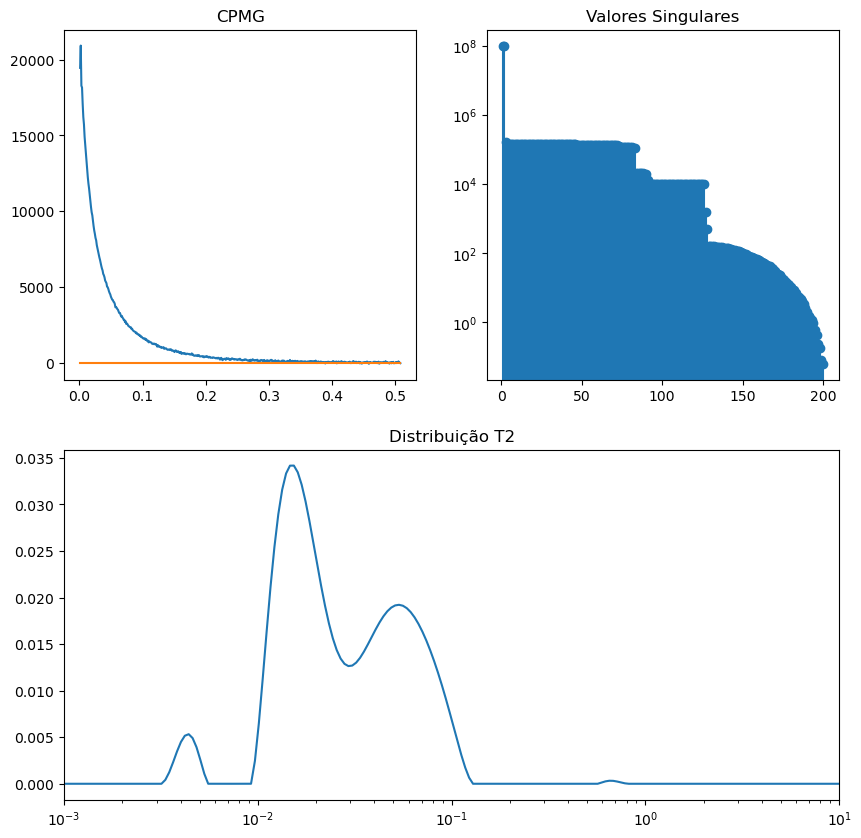

In [62]:
# Usage example
file_path = r"C:\Users\Will\OneDrive\Desktop\IC\ILT\CPMG_1.txt"
result = perform_ILT(file_path)

In [59]:
result.shape

(2, 200)

In [60]:
result

array([[ 1.00000000e-03,  1.04737090e-03,  1.09698580e-03,
         1.14895100e-03,  1.20337784e-03,  1.26038293e-03,
         1.32008840e-03,  1.38262217e-03,  1.44811823e-03,
         1.51671689e-03,  1.58856513e-03,  1.66381689e-03,
         1.74263339e-03,  1.82518349e-03,  1.91164408e-03,
         2.00220037e-03,  2.09704640e-03,  2.19638537e-03,
         2.30043012e-03,  2.40940356e-03,  2.52353917e-03,
         2.64308149e-03,  2.76828663e-03,  2.89942285e-03,
         3.03677112e-03,  3.18062569e-03,  3.33129479e-03,
         3.48910121e-03,  3.65438307e-03,  3.82749448e-03,
         4.00880633e-03,  4.19870708e-03,  4.39760361e-03,
         4.60592204e-03,  4.82410870e-03,  5.05263107e-03,
         5.29197874e-03,  5.54266452e-03,  5.80522552e-03,
         6.08022426e-03,  6.36824994e-03,  6.66991966e-03,
         6.98587975e-03,  7.31680714e-03,  7.66341087e-03,
         8.02643352e-03,  8.40665289e-03,  8.80488358e-03,
         9.22197882e-03,  9.65883224e-03,  1.01163798e-0

# Nova seção